In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('waiter_tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<AxesSubplot:>

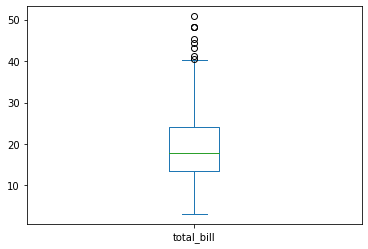

In [6]:
df['total_bill'].plot(kind='box')

<AxesSubplot:>

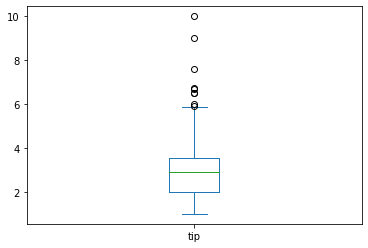

In [7]:
df['tip'].plot(kind='box')

<AxesSubplot:>

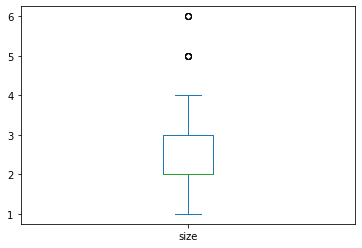

In [8]:
df['size'].plot(kind='box')

<AxesSubplot:>

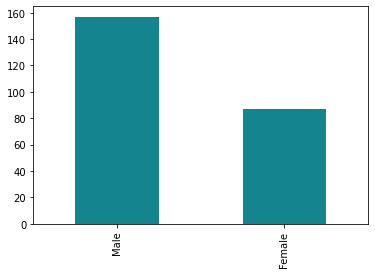

In [9]:
df['sex'].value_counts().plot(kind='bar',color='#14848F')

<AxesSubplot:>

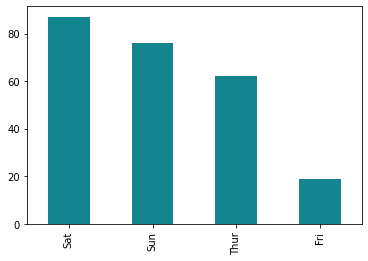

In [10]:
df['day'].value_counts().plot(kind='bar',color='#14848F')

<AxesSubplot:>

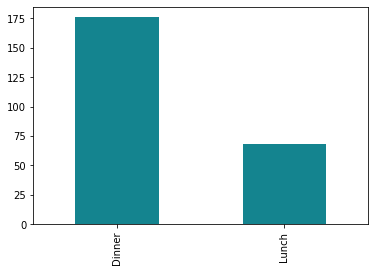

In [11]:
df['time'].value_counts().plot(kind='bar',color='#14848F')

<AxesSubplot:>

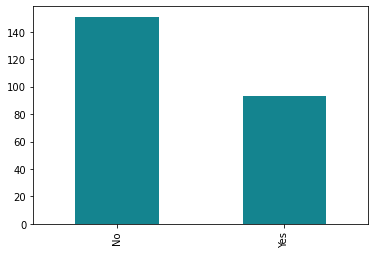

In [12]:
df['smoker'].value_counts().plot(kind='bar',color='#14848F')

In [13]:
df["sex"] = df["sex"].map({"Female": 0, "Male": 1})

In [14]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,No,Sun,Dinner,2
1,10.34,1.66,1,No,Sun,Dinner,3
2,21.01,3.50,1,No,Sun,Dinner,3
3,23.68,3.31,1,No,Sun,Dinner,2
4,24.59,3.61,0,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,No,Sat,Dinner,3
240,27.18,2.00,0,Yes,Sat,Dinner,2
241,22.67,2.00,1,Yes,Sat,Dinner,2
242,17.82,1.75,1,No,Sat,Dinner,2


In [15]:
df["smoker"] = df["smoker"].map({"No": 0, "Yes": 1})
df["day"] = df["day"].map({"Thur": 0, "Fri": 1, "Sat": 2, "Sun": 3})
df["time"] = df["time"].map({"Lunch": 0, "Dinner": 1})

In [16]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,3,1,2
1,10.34,1.66,1,0,3,1,3
2,21.01,3.50,1,0,3,1,3
3,23.68,3.31,1,0,3,1,2
4,24.59,3.61,0,0,3,1,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,2,1,3
240,27.18,2.00,0,1,2,1,2
241,22.67,2.00,1,1,2,1,2
242,17.82,1.75,1,0,2,1,2


In [17]:
X=df[['total_bill','sex','smoker','day','time','size']]

In [18]:
X

,total_bill,sex,smoker,day,time,size
0,16.99,0,0,3,1,2
1,10.34,1,0,3,1,3
2,21.01,1,0,3,1,3
3,23.68,1,0,3,1,2
4,24.59,0,0,3,1,4
...,...,...,...,...,...,...
239,29.03,1,0,2,1,3
240,27.18,0,1,2,1,2
241,22.67,1,1,2,1,2
242,17.82,1,0,2,1,2


In [19]:
y=df['tip']

In [20]:
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [80]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y,test_size=0.5,random_state=44)

In [81]:
from sklearn.linear_model import LinearRegression
my_model = LinearRegression()
my_model.fit(xtrain, ytrain)

LinearRegression()

In [82]:
predicted_tip=my_model.predict(X)
predicted_tip

array([2.77007347, 2.53163253, 3.38353816, 3.18634504, 4.19760487,
       4.13562764, 1.99591272, 4.26257515, 2.49651705, 2.47575834,
       2.11567452, 5.0495105 , 2.52685671, 3.58791699, 2.59761647,
       3.01867852, 2.64870019, 3.00668769, 3.17884578, 3.18809546,
       2.55975985, 2.86684956, 2.50596733, 5.09708396, 2.71145813,
       3.37171558, 2.19648237, 2.14219036, 2.86155959, 2.81575119,
       1.89148898, 3.41482983, 2.44928008, 3.71952431, 2.54858208,
       3.46035396, 2.84158464, 3.00895226, 3.0316067 , 4.03600903,
       2.82002752, 2.68973276, 2.40869173, 2.06856821, 4.54361619,
       2.75600096, 3.0705753 , 4.70329859, 3.98554083, 2.73604066,
       2.29691405, 2.23513741, 5.01358196, 2.08932692, 4.15718477,
       2.85181041, 5.13159911, 3.35547772, 2.17351186, 5.8036786 ,
       2.89607474, 2.37870375, 2.15594679, 3.5571306 , 2.94378138,
       3.14258597, 2.56025935, 1.22870617, 2.74419302, 2.47451319,
       2.08869675, 3.02013002, 3.53849751, 3.41234841, 2.42293

In [83]:
result=pd.DataFrame({'Actual':y,'Predictions':predicted_tip})
result

,Actual,Predictions
0,1.01,2.770073
1,1.66,2.531633
2,3.50,3.383538
3,3.31,3.186345
4,3.61,4.197605
...,...,...
239,5.92,3.857165
240,2.00,3.564047
241,2.00,3.086097
242,1.75,2.551776


C:\Users\wasif\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 11.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\wasif\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


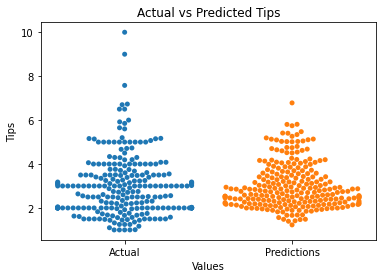

In [87]:
import seaborn as sns
sns.swarmplot(x="variable", y="value", data=pd.melt(result))

plt.title('Actual vs Predicted Tips')
plt.xlabel('Values')
plt.ylabel('Tips')
plt.show()


In [85]:
from sklearn.metrics import mean_squared_error

In [86]:
mse = mean_squared_error(y,predicted_tip)
print("Mean Squared Error", mse)

Mean Squared Error 1.0694158993572018
